# Prediction using Supervised ML - Simple Linear Regression 

## Dataset

## Problem Statement

In this regression task is to predict the percentage of marks the students are expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Also will be predicting the score if a student studies for 9.25 hrs/ day.

Hours - Number of hours studied

Scores - Percentage scores obtained by the student

### Import Required Libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.1f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

### Data Undestanding

In [54]:
df_score = pd.read_csv('student_scores.csv')
df_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [55]:
df_score.shape # There are 25 obsevations and 2 features present

(25, 2)

In [56]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [57]:
# No null values present.
# All data types are correctly identified.

In [58]:
df_target = df_score['Scores']

### Distribution of Variables

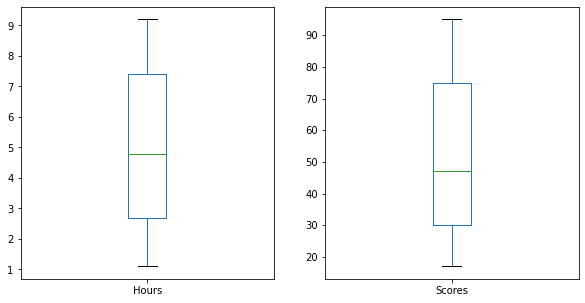

In [59]:
df_score.plot(kind = 'box', subplots = True, layout = (1,2),sharex = False, figsize = (10,5))
plt.show()

In [60]:
# From the box plot we can see that there are no ouliers present.

#### Ploting kde to see the ditribution of numerical independent variable 'Score'.

In [61]:
score = df_score['Hours']

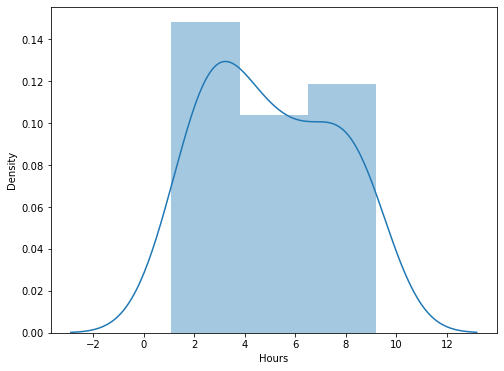

In [62]:
plt.figure(figsize =(8,6))
sns.distplot(score)
plt.show()

In [63]:
score.skew() 

0.1903382010052985

#### Ploting kde plot to see distribution of numerical dependent variable.

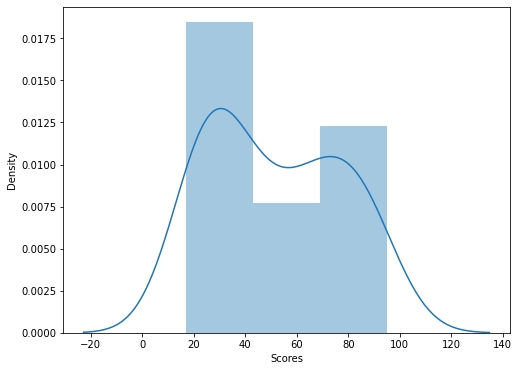

In [64]:
plt.figure(figsize =(8,6))
sns.distplot(df_target)
plt.show()

In [65]:
df_target.skew()  # Slightly elongated to right - positive skew ,Which is acceptable.

0.2339646665397317

#### Ploting a 2D scatter plot to see how data points are distributed 

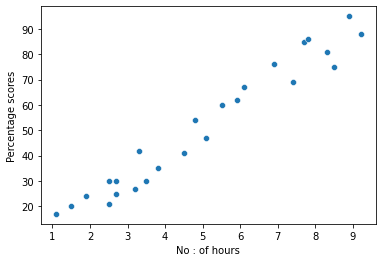

In [66]:
sns.scatterplot(x = 'Hours', y = 'Scores',data = df_score)
plt.xlabel('No : of hours')
plt.ylabel('Percentage scores')
plt.show()

In [67]:
# There is a positive liner relationship between the independent variable 'Hours' and the dependent variable 'Scores'

### Preparing the data

##### Before applying linear regression to predict the percentage scores attanined by the student, let us split the dataset in train and test set by using Scikit-Learn's built-in train_test_split() method:

In [68]:
X = df_score.iloc[:, :-1].values  
y = df_score.iloc[:, 1].values  

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =0.2, random_state = 1)

### Train the Algorithm

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(X_train, y_train)

print('Training the algorithm completed')

Training the algorithm completed


### Plotting the regression line

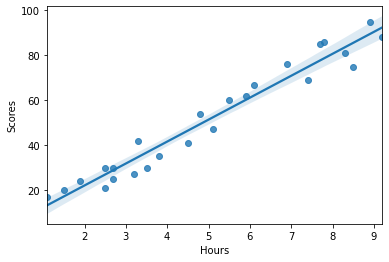

In [72]:
sns.regplot(x="Hours", y="Scores", data=df_score)
plt.show()

### Making Predictions

#### Here is when we do prediction on the test data 

In [73]:
y_pred = lr.predict(X_test)

In [74]:
# Comparing Actual percentage scores and Predicted
df_new = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df_new

,Actual,Predicted
0,17,10.0
1,42,33.0
2,24,18.3
3,75,87.4
4,54,48.7


In [75]:
# Now predicting the percentage score if a student studies for 9.25 hrs/ day

In [80]:
hrs = np.array(9.25).reshape(-1,1)
hrs_pred = lr.predict(hrs)
print('No : of hours the student studied : ',hrs[0,0])
print('Predicted Score if a student studies for 9.25 hrs/day  :',round(hrs_pred[0],2))

No : of hours the student studied :  9.25
Predicted Score if a student studies for 9.25 hrs/day  : 95.23


### If a student studies for 9.25 hours/per , the student is expected to get 95.23 percentage.

### Model Evaluation

In [77]:
# Predicting over the test set and calculating the error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R Squared: ', r2_score(y_test, y_pred))
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))
print('MAE: ', mae)

R Squared:  0.8421031525243527
MSE:  68.88092074277635
RMSE:  8.299453038771674
MAE:  7.882398086270432
